In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [102]:
climbdf = pd.read_csv("cleaned_data/cleaned-climbs.csv")

In [103]:
climbdf.head()

,Unnamed: 0,climb_id,climb_name,climb_link,fa_year,feet,page_views,pitches,avg_stars,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,guide_aid_grade,guide_boulder_grade,guide_ice_grade,guide_mixed_grade,guide_rock_grade,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade,guide_aid_grade_number,guide_rock_grade_number,guide_boulder_grade_number,concensus_rock_grade_number,concensus_boulder_grade_number,concensus_ice_grade_number,guide_ice_grade_number,concensus_mixed_grade_number,guide_mixed_grade_number,concensus_aid_grade_number,state,latitude,longitude
0,0,105714713,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
1,1,105714716,paperboy-centerfold,http://www.mountainproject.com/v/paperboy-cent...,NaN,60,1320,1,2.1333,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8,NaN,8,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
2,2,105714719,blockhead,http://www.mountainproject.com/v/blockhead/105...,NaN,70,1106,1,2.3529,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,0,0,0,5.10,0,0,0,0,5.10,NaN,10,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
3,3,105714722,central-yellow-wall,http://www.mountainproject.com/v/central-yello...,NaN,20,1377,NaN,3.2857,/destinations/,/v/south-dakota/105708963,/v/custer-state-park/106058091,/v/sylvan-lake-/106887955,/v/outlets/105714243,/v/campground-boulder/105714321,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0,V3,0,0,0,0,V3,0,0,0,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN,South Dakota,43.8477,-103.5668
4,4,105714728,waves,http://www.mountainproject.com/v/waves/105714728,NaN,180,9063,2,3.4797,/destinations/,/v/south-dakota/105708963,/v/mount-rushmore-national-memorial/106062228,/v/south-seas/105714249,/v/shipyard-rock/105714333,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,5.8,0,0,0,0,5.8,NaN,8,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,43.8864,-103.4670


In [104]:
climbdf.state.unique()

array(['South Dakota', 'Wyoming', 'Utah', 'California', 'Wisconsin',
       'Nevada', 'Arizona', 'Idaho', 'Colorado', 'New Mexico', 'Oregon',
       'Washington', 'New York', 'Connecticut', 'Massachusetts', 'Texas',
       'Minnesota', 'Virginia', 'Kentucky', 'West Virginia', 'Oklahoma',
       'New Hampshire', 'North Carolina', 'Michigan', 'Tennessee',
       'Georgia', 'Missouri', 'Arkansas', 'Alabama', 'Alaska', 'Illinois',
       'Montana', 'Ohio', 'Maine', 'Maryland', 'Pennsylvania', 'Vermont',
       'Iowa', 'Hawaii', 'New Jersey', 'Rhode Island'], dtype=object)

In [192]:
x = climbdf.groupby("state")['climb_id'].count()

In [193]:
a = x.values
b = range(len(x))
c = x.index.values

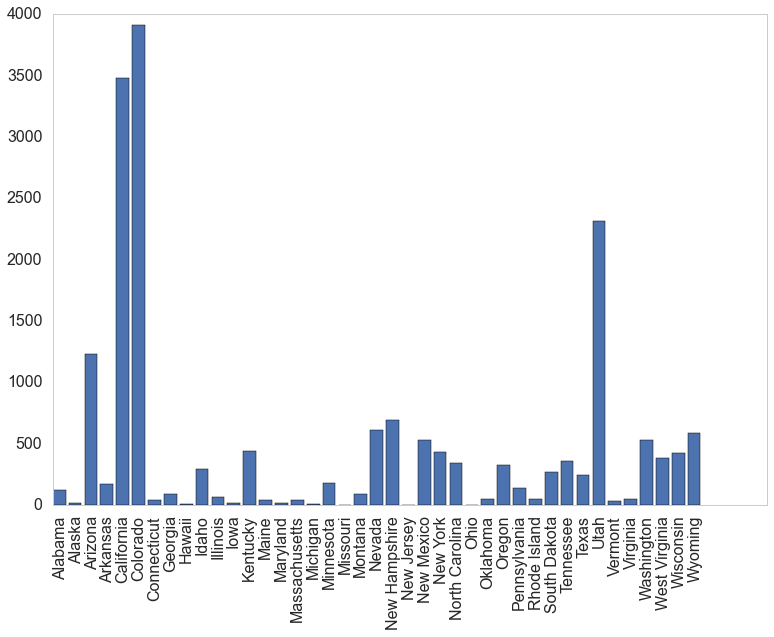

In [194]:
plt.bar(b,a)
plt.xticks(b,c, rotation = 'vertical', ha = 'left')
plt.grid(False)

In [195]:
userdf = pd.read_csv("cleaned_data/cleaned-users.csv")

In [196]:
userdf.head()

,Unnamed: 0,user_id,climbs_trad,gender,age,climbs_aid,user_country,user_state,user_city,user_zip_code,climbs_ice,climbs_boulder,user_link,climbs_mixed,climbs_sport,member_date,user_name,lead_diff_sport,boulder_diff,follow_diff_sport,lead_diff_ice,lead_diff_trad,follow_diff_ice,follow_diff_trad,follow_diff_mixed,lead_diff_mixed,follow_diff_aid,lead_diff_aid,lead_diff_sport_number,follow_diff_aid_number,lead_diff_ice_number,follow_diff_sport_number,follow_diff_mixed_number,lead_diff_aid_number,lead_diff_mixed_number,lead_diff_trad_number,boulder_diff_number,follow_diff_ice_number,follow_diff_trad_number,longitude,latitude,user_city_geo,user_state_geo,user_zip_geo
0,0,10101,0,0,37,0,USA,WA,Seattle,NaN,0,0,https://www.mountainproject.com/u/michael-koma...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",michael-komarnitsky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.329447,47.603569,Seattle,Washington,NaN
1,1,10106,1,0,35,1,USA,NM,Albuquerque,NaN,0,1,https://www.mountainproject.com/u/patrick-vern...,0,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",patrick-vernon,5.13a,V8,5.13a,NaN,5.12d,NaN,5.12d,NaN,NaN,C2,C2,16,2,NaN,16,NaN,2,NaN,15.5,8,NaN,15.5,-106.649049,35.084233,Albuquerque,New Mexico,NaN
2,2,10108,0,0,36,0,USA,CO,Denver,NaN,0,0,https://www.mountainproject.com/u/quinn-steven...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",quinn-stevens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-104.992298,39.740012,Denver,Colorado,NaN
3,3,10109,0,0,NaN,0,USA,WI,Wauwatosa,NaN,0,0,https://www.mountainproject.com/u/ramin-jamshi...,0,0,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",ramin-jamshidi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.008438,43.060752,Wauwatosa,Wisconsin,NaN
4,4,10116,1,0,34,0,USA,AZ,Phoenix,NaN,0,1,https://www.mountainproject.com/u/peter-franze...,0,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",peter-franzen,5.13a,V9,5.13a,NaN,5.11c,NaN,5.12a,NaN,NaN,NaN,NaN,16,NaN,NaN,16,NaN,NaN,NaN,13.0,9,NaN,14.0,-112.075796,33.448252,Phoenix,Arizona,NaN


In [202]:
userdf.columns

Index([u'Unnamed: 0', u'user_id', u'climbs_trad', u'gender', u'age', u'climbs_aid', u'user_country', u'user_state', u'user_city', u'user_zip_code', u'climbs_ice', u'climbs_boulder', u'user_link', u'climbs_mixed', u'climbs_sport', u'member_date', u'user_name', u'lead_diff_sport', u'boulder_diff', u'follow_diff_sport', u'lead_diff_ice', u'lead_diff_trad', u'follow_diff_ice', u'follow_diff_trad', u'follow_diff_mixed', u'lead_diff_mixed', u'follow_diff_aid', u'lead_diff_aid',
       u'lead_diff_sport_number', u'follow_diff_aid_number', u'lead_diff_ice_number', u'follow_diff_sport_number', u'follow_diff_mixed_number', u'lead_diff_aid_number', u'lead_diff_mixed_number', u'lead_diff_trad_number', u'boulder_diff_number', u'follow_diff_ice_number', u'follow_diff_trad_number', u'longitude', u'latitude', u'user_city_geo', u'user_state_geo', u'user_zip_geo'],
      dtype='object')

In [198]:
userdf['user_state_geo'].unique()

array(['Washington', 'New Mexico', 'Colorado', 'Wisconsin', 'Arizona',
       'Maryland', 'Utah', nan, 'California', 'Tennessee', 'Nebraska',
       'New York', 'Wyoming', 'Montana', 'Idaho', 'Alabama', 'Nevada',
       'North Carolina', 'Illinois', 'Arkansas', 'Minnesota',
       'South Dakota', 'Oregon', 'Texas', 'Hawaii', 'New Hampshire',
       'Missouri', 'Connecticut', 'Florida', 'Indiana', 'Georgia', 'Ohio',
       'Maine', 'Kansas', 'Michigan', 'Vermont', 'Kentucky', 'New Jersey',
       'Alaska', 'Oklahoma', 'West Virginia', 'Virginia', 'Pennsylvania',
       'Massachusetts', 'Mississippi', 'South Carolina',
       'District of Columbia', 'Iowa', 'Louisiana', 'North Dakota',
       'Rhode Island', 'District Of Columbia', 'Delaware'], dtype=object)

In [199]:
x = userdf.groupby('user_state_geo')['user_id'].count()

In [200]:
a = x.values
b = range(len(x))
c = x.index.values

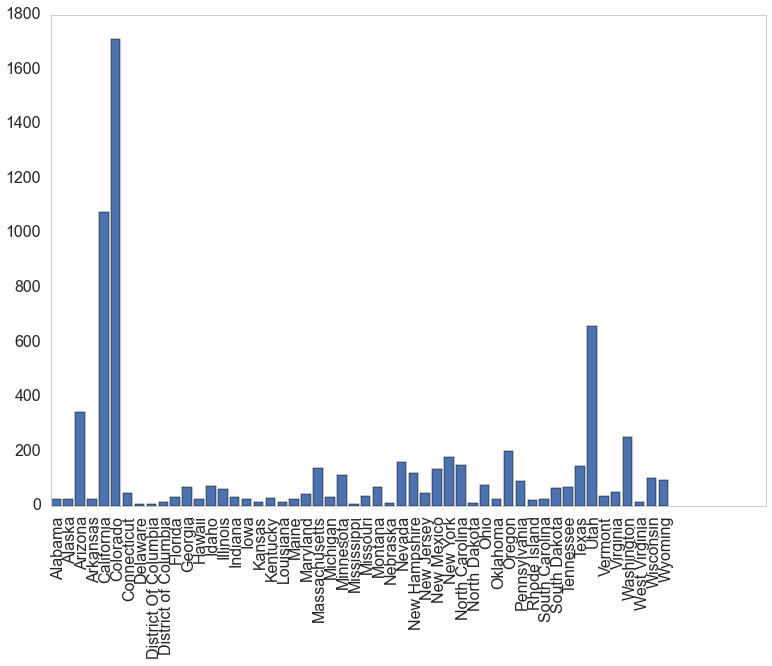

In [201]:
plt.bar(b,a)
plt.xticks(b,c, rotation = 'vertical', ha = 'left')
plt.grid(False)

In [168]:
y = userdf['age'].values
z = y[~np.isnan(y)]

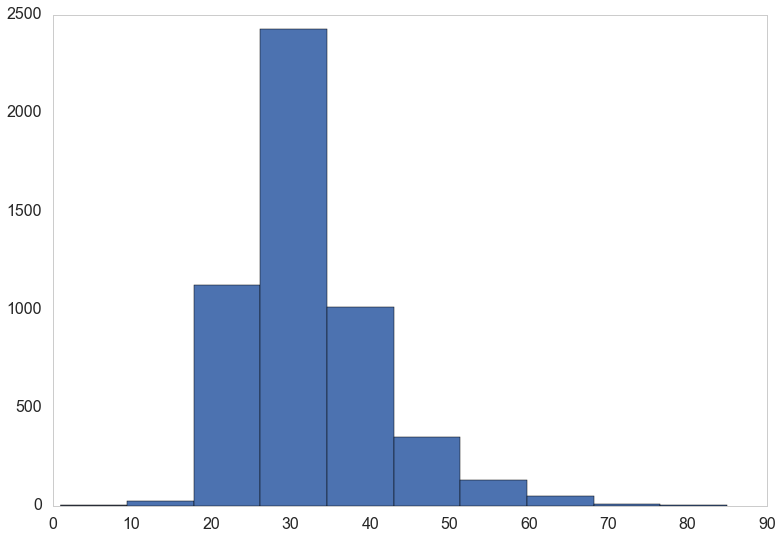

In [171]:
plt.hist(z)
plt.grid(False)

In [178]:
x = userdf.groupby('gender')['user_id'].count()
a = x.values
b = x.index.values
c = ['male','female']

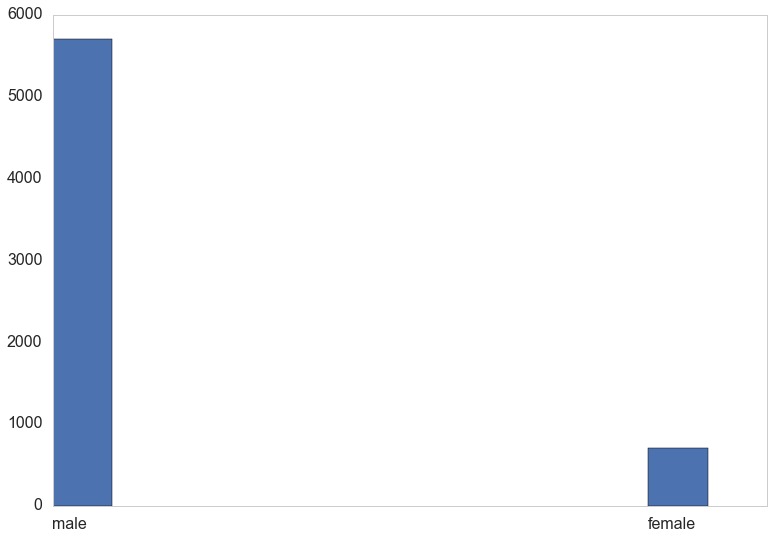

In [187]:
plt.bar(b,a, width = 0.1)
plt.xticks(b,c, ha = 'left')
plt.grid(False)

In [203]:
ucdf = pd.read_csv("cleaned_data/cleaned-all-joined-df.csv")
ucdf.head()

,Unnamed: 0,climb_id,user_id,star_rating,tick_date,ticked,sugg_aid_grade,sugg_boulder_grade,sugg_ice_grade,sugg_mixed_grade,sugg_rock_grade,sugg_ice_grade_number,sugg_boulder_grade_number,sugg_aid_grade_number,sugg_mixed_grade_number,sugg_rock_grade_number,location_state,climbs_trad,gender,age,climbs_aid,climbs_ice,climbs_boulder,user_link,climbs_mixed,location_place,climbs_sport,member_date,user_name,lead_diff_sport,boulder_diff,follow_diff_sport,lead_diff_ice,lead_diff_trad,follow_diff_ice,follow_diff_trad,follow_diff_mixed,lead_diff_mixed,follow_diff_aid,lead_diff_aid,lead_diff_sport_number,follow_diff_aid_number,lead_diff_ice_number,follow_diff_sport_number,follow_diff_mixed_number,lead_diff_aid_number,lead_diff_mixed_number,lead_diff_trad_number,boulder_diff_number,follow_diff_ice_number,...,user_city,user_state_y,climb_name,climb_link,fa_year,feet,page_views,pitches,avg_stars,area_0,area_1,area_2,area_3,area_4,area_5,area_6,area_7,area_8,area_9,"type_TR,",type_aid,type_alpine,type_boulder,type_ice,type_mixed,type_sport,type_trad,guide_aid_grade,guide_boulder_grade,guide_ice_grade,guide_mixed_grade,guide_rock_grade,concensus_aid_grade,concensus_boulder_grade,concensus_ice_grade,concensus_mixed_grade,concensus_rock_grade,guide_aid_grade_number,guide_rock_grade_number,guide_boulder_grade_number,concensus_rock_grade_number,concensus_boulder_grade_number,concensus_ice_grade_number,guide_ice_grade_number,concensus_mixed_grade_number,guide_mixed_grade_number,concensus_aid_grade_number,state,latitude_y,longitude_y
0,0,105714713,10246,2,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,8,UT,1,0,38,1,1,1,https://www.mountainproject.com/u/andrew-gram/...,0,Salt Lake City,1,"(2001, 1, 1, 0, 0, 0, 0, 1, -1)",andrew-gram,5.9,V1,5.10a,WI3,5.9,WI5,5.10b,NaN,NaN,C1,C3,9,1,3,10.0,NaN,3,NaN,9,1,5,...,Salt Lake City,Utah,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
1,1,105714713,105790589,2,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,NaN,NaN,8,SD,1,0,37,0,0,1,https://www.mountainproject.com/u/brian-k//105...,0,Rapid City,1,"(2006, 1, 26, 0, 0, 0, 3, 26, -1)",brian-k,0,V0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,Rapid City,South Dakota,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
2,2,105714713,105829183,2,"time.struct_time(tm_year=2007, tm_mon=4, tm_md...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,1,0,37,0,0,0,https://www.mountainproject.com/u/joelhagan//1...,0,Rapid City,1,"(2006, 5, 31, 0, 0, 0, 2, 151, -1)",joelhagan,5.9,NaN,5.10b,NaN,5.9,NaN,5.10a,NaN,NaN,NaN,NaN,9,NaN,NaN,10.5,NaN,NaN,NaN,9,NaN,NaN,...,Rapid City,South Dakota,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,0,0,0,0,5.8,0,0,0,0,5.8-,NaN,8,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,South Dakota,44.0597,-103.4232
3,3,105714713,105883077,NaN,"time.struct_time(tm_year=2006, tm_mon=11, tm_m...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,0,0,30,0,0,0,https://www.mountainproject.com/u/paxton-alsga...,0,Fairfax,1,"(2006, 11, 5, 0, 0, 0, 6, 309, -1)",paxton-alsgaard,5.9,NaN,5.10a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Fairfax,Virginia,garden-party,http://www.mountainproject.com/v/garden-party/...,NaN,60,1157,1,2.0769,/destinations/,/v/south-dakota/105708963,/v/falling-rock/105714240,/v/north-canyon-wall/105714312,NaN,NaN,NaN,NaN,NaN

In [205]:
ucdf_stars = ucdf.star_rating.values
ucdf_stars = ucdf_stars[~np.isnan(ucdf_stars)]

(array([   2623.,       0.,   44178.,       0.,       0.,  187731.,
              0.,  241753.,       0.,  144726.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

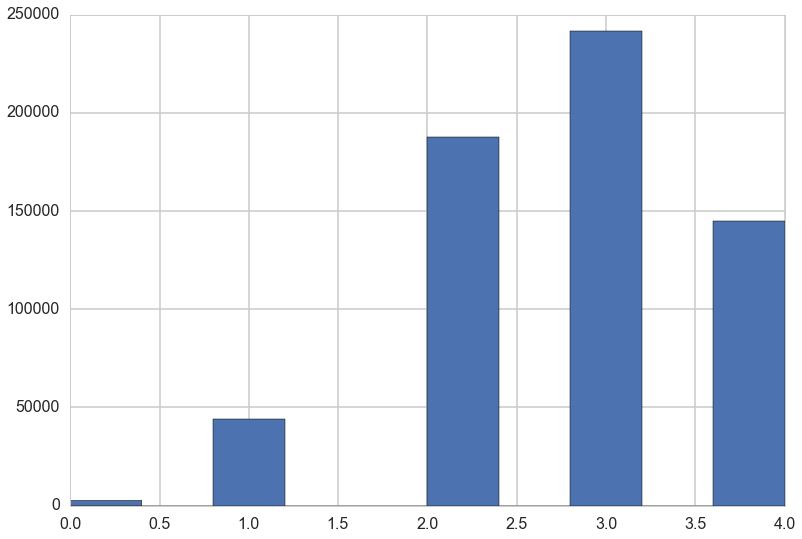

In [208]:
plt.hist(ucdf_stars)